In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
colors = pd.read_csv('./data/Lego/colors.csv')
sets = pd.read_csv('./data/Lego/sets.csv')
themes = pd.read_csv('./data/Lego/themes.csv')

<img src='./data/Lego/Images/bricks.jpg'>

In [4]:
print(colors.head())

   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f


In [5]:
colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

<img src='./data/Lego/Images/lego_themes.png'>

In [6]:
print(sets.head())

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


In [22]:
#First set of Lego
sets['year'].idxmin()

9521

In [25]:
first_set = sets.loc[9521]
first_set

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

In [31]:
#First year selling
first_year_of_selling = sets.groupby('year').count()
first_year_of_selling

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [38]:
#Top 5 Lego sets
top_number = sets.groupby('num_parts').max()
top_number


,set_num,name,year,theme_id
num_parts,,,,
0,wwgp1-1,Zoo Super Pack 4 in 1,2021,708
1,tech007promo-1,racer polybag,2020,706
2,legobricks-1,Yoda Magnet,2020,695
3,sw117promo-1,Yellow Car,2019,702
4,SWDVDBD-1,Zoo Van (Animal Transporter),2020,702
...,...,...,...,...
5922,10189-1,Taj Mahal,2008,673
5923,10256-1,Taj Mahal,2017,673
6020,71043-1,Hogwarts Castle,2018,246


In [40]:
#Agg

themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace = True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


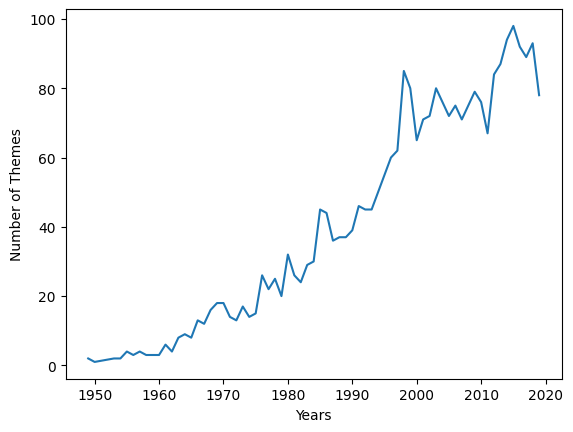

In [49]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.xlabel('Years')
plt.ylabel('Number of Themes')
plt.show()